<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/emergency_ed_occupancy_day_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 5.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.2 MB/s 
     |████████████████████████████████| 69 kB 3.5 MB/s 
     |████████████████████████████████| 1.4 MB 36.5 MB/s 
     |████████████████████████████████| 2.0 MB 46.0 MB/s 
     |████████████████████████████████| 79.9 MB 88 kB/s 
     |████████████████████████████████| 122 kB 45.1 MB/s 
     |████████████████████████████████| 6.5 MB 18.4 MB/s 
     |████████████████████████████████| 303 kB 65.6 MB/s 
     |████████████████████████████████| 11.2 MB 77.1 MB/s 
     |████████████████████████████████| 9.8 MB 44.9 MB/s 
     |████████████████████████████████| 930 kB 37.5 MB/s 
     |████████████████████████████████| 34.5 MB 1.2 MB/s 
  Created wheel for pyod: filename=p

In [13]:
import pandas as pd
data = pd.read_csv('/content/ed_occupancy_no_covid.csv')
data['date'] = pd.to_datetime(data['date'])
#data.set_index('date').plot()
data.set_index('date', inplace=True, drop=True)
data = data.asfreq('D')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ED_occupancy  1826 non-null   int64
dtypes: int64(1)
memory usage: 28.5 KB


In [9]:
#Interpolation is a method of estimating the value(s) of new data point(s) that lies between a range of known discrete data points.
#data['ED_occupancy'].interpolate(method = 'linear', inplace = True)


In [15]:
data['ED_occupancy'].isnull().values.any()

False

In [16]:
data.shape

(1826, 1)

In [17]:
data.head()

,ED_occupancy
date,
2015-01-01,6691
2015-01-02,7893
2015-01-03,7258
2015-01-04,7487
2015-01-05,7615


In [18]:
from pycaret.time_series import *
#fh = forecast horizon
setup(data, fh = 50, fold = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,ED_occupancy
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1826, 1)"
5,Train data shape,"(1776, 1)"
6,Test data shape,"(50, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [19]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,1826.0
1,Summary,Statistics,Actual,Mean,,9048.511501
2,Summary,Statistics,Actual,Median,,8932.5
3,Summary,Statistics,Actual,Standard Deviation,,1096.257841
4,Summary,Statistics,Actual,Variance,,1201781.25384
5,Summary,Statistics,Actual,Kurtosis,,0.050305
6,Summary,Statistics,Actual,Skewness,,0.484427
7,Summary,Statistics,Actual,# Distinct Values,,1482.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",16591.733773
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",27323.438663


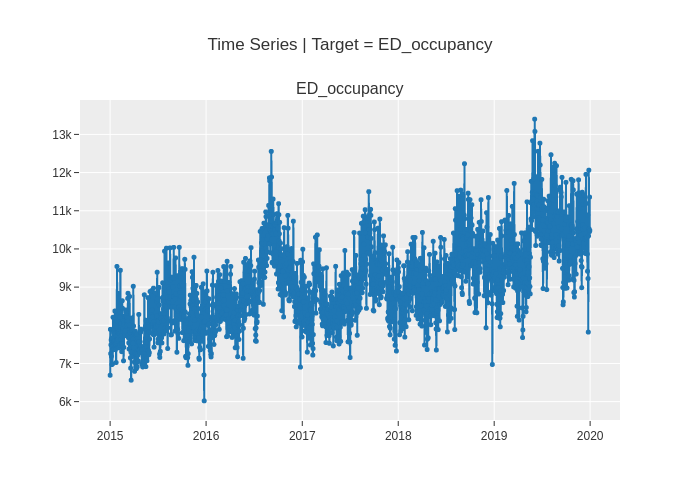

In [20]:
plot_model(plot = 'ts')

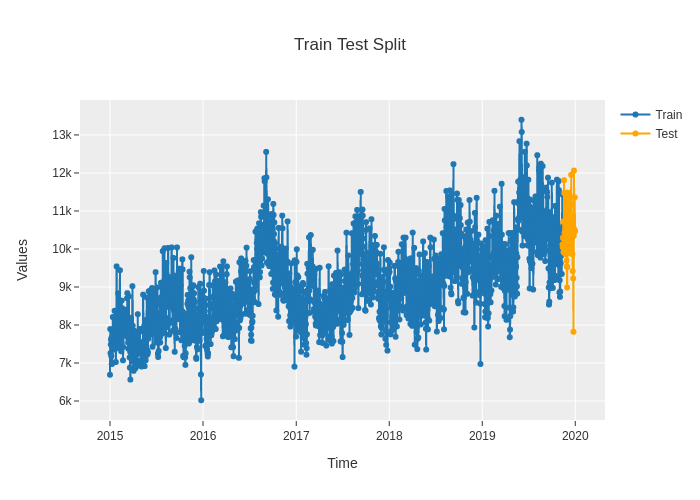

In [21]:
plot_model(plot = 'train_test_split')

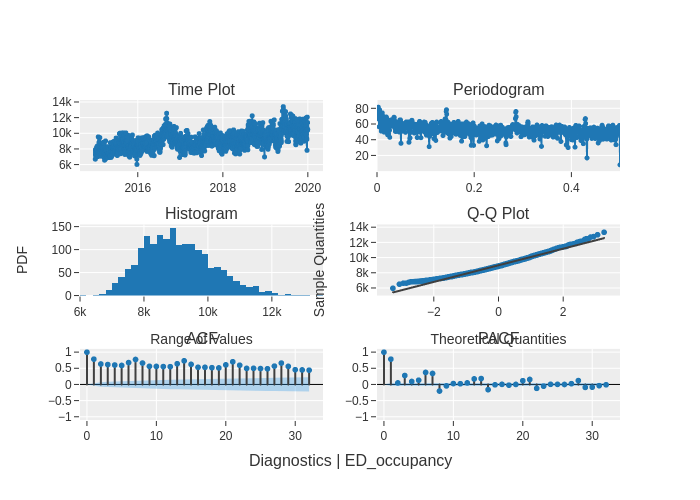

In [22]:
plot_model(plot = 'diagnostics')

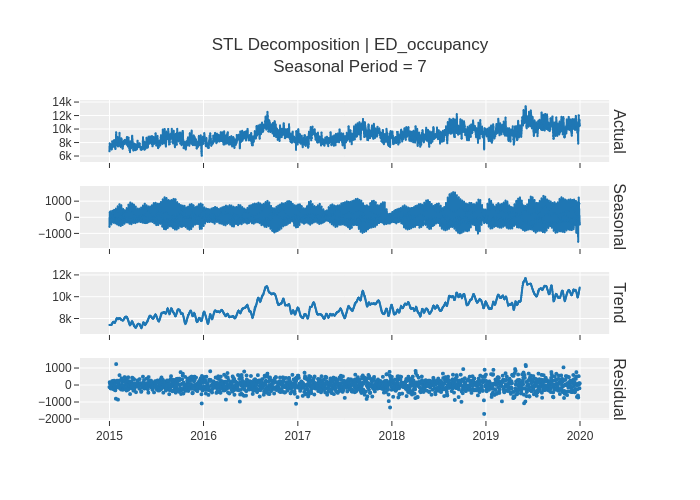

In [23]:
plot_model(plot = 'decomp_stl')

In [24]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,655.2889,819.4514,0.0626,0.0641,1.202,1.1799,0.1804,0.384
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,655.2889,819.4514,0.0626,0.0641,1.202,1.1799,0.1804,0.278
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,655.2891,819.4518,0.0626,0.0641,1.202,1.1799,0.1804,0.274
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,655.189,819.3644,0.0626,0.0641,1.2018,1.1797,0.1806,0.282
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,655.2889,819.4515,0.0626,0.0641,1.202,1.1799,0.1804,0.282
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,655.2889,819.4514,0.0626,0.0641,1.202,1.1799,0.1804,0.264
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,673.694,838.043,0.0642,0.0658,1.2349,1.2058,0.1433,0.280
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,679.199,848.1368,0.0644,0.0665,1.2453,1.2206,0.1266,0.316
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,691.1497,862.379,0.0653,0.0679,1.2665,1.2404,0.0741,0.454
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,694.2851,881.8616,0.0665,0.0682,1.2739,1.27,0.0359,0.616


In [25]:
lr_cds_dt	 = create_model('lr_cds_dt')
print('lr_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2019-03-06,566.6497,706.9355,0.0626,0.0600,1.0618,1.0411,0.1615
1,2019-04-25,1083.4762,1364.3832,0.0977,0.1046,2.0090,1.9903,-0.3182
2,2019-06-14,498.2548,598.7529,0.0463,0.0472,0.9033,0.8501,0.4243
3,2019-08-03,597.0685,767.9802,0.0552,0.0564,1.0813,1.0916,0.3235
4,2019-09-22,530.9955,659.2053,0.0514,0.0524,0.9546,0.9262,0.3108
Mean,NaT,655.2889,819.4514,0.0626,0.0641,1.2020,1.1799,0.1804
SD,NaT,216.6562,278.0814,0.0183,0.0207,0.4089,0.4140,0.2630


lr_cds_dt


In [26]:
tuned_lr_cds_dt = tune_model(lr_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2019-03-06,570.9087,711.2730,0.0631,0.0604,1.0698,1.0475,0.1511
1,2019-04-25,1104.9322,1399.8312,0.0993,0.1068,2.0487,2.0420,-0.3876
2,2019-06-14,449.2339,528.6862,0.0424,0.0427,0.8144,0.7506,0.5512
3,2019-08-03,561.3646,715.1307,0.0523,0.0532,1.0167,1.0164,0.4134
4,2019-09-22,509.8053,632.0394,0.0494,0.0502,0.9165,0.8880,0.3664
Mean,NaT,639.2490,797.3921,0.0613,0.0627,1.1732,1.1489,0.2189
SD,NaT,236.8369,308.7590,0.0201,0.0228,0.4464,0.4587,0.3294


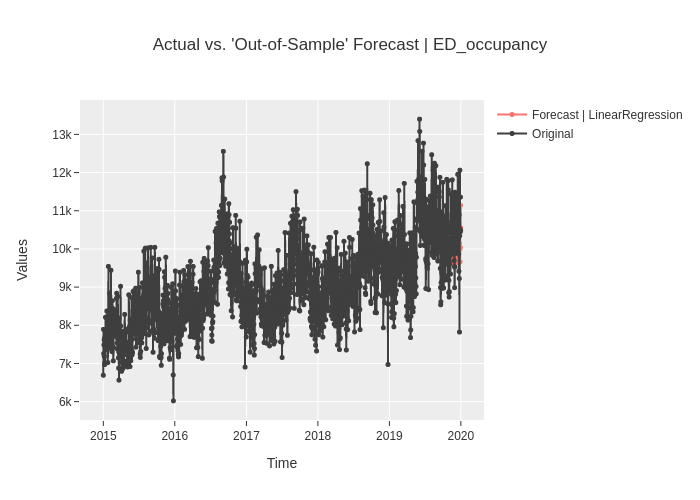

In [27]:
plot_model(tuned_lr_cds_dt, plot = 'forecast')

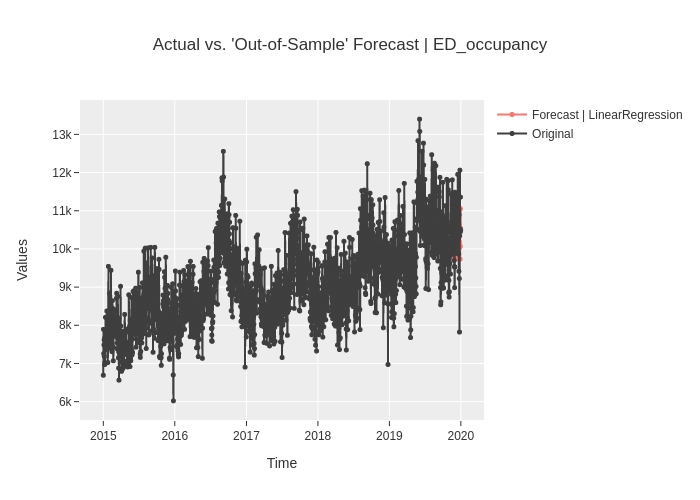

In [28]:
plot_model(best, plot = 'forecast')

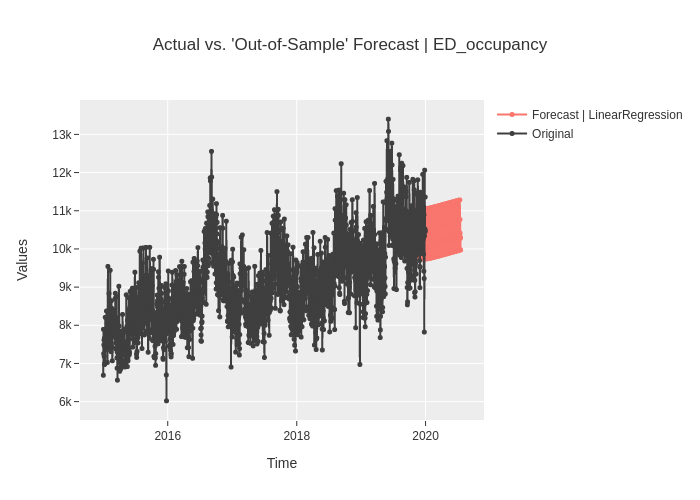

In [29]:
#fh = forecast horizon
plot_model(best, plot= 'forecast', data_kwargs = {'fh' : 250})

In [32]:
final_best = finalize_model(best)
predict_model(final_best, fh = 100)

,y_pred
2020-01-01,10085.5314
2020-01-02,10233.7393
2020-01-03,10428.2239
2020-01-04,10028.3226
2020-01-05,10310.3445
...,...
2020-04-05,10200.2756
2020-04-06,11194.9738
2020-04-07,10673.3461
2020-04-08,10306.1478


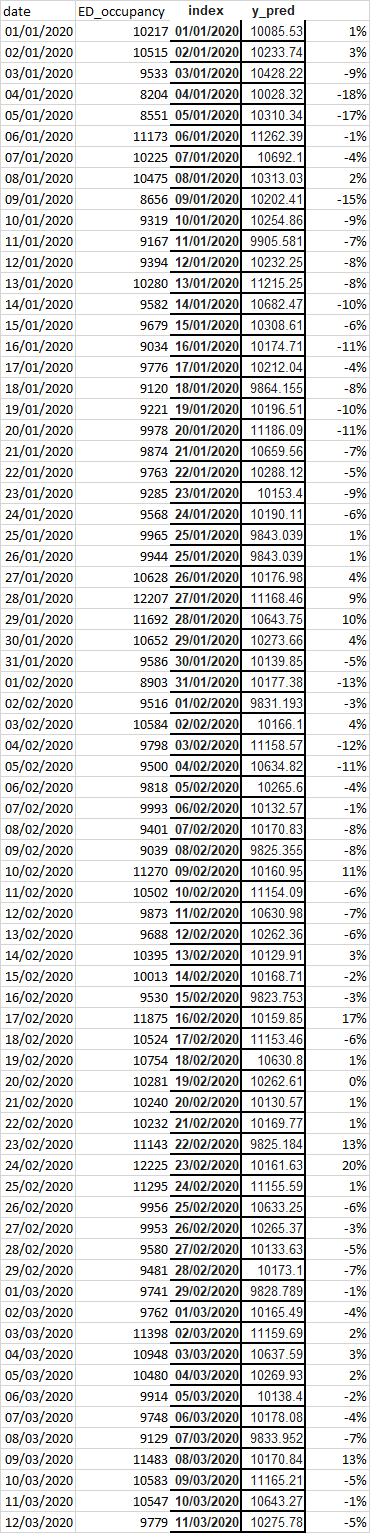

In [ ]:
save_model(final_best, 'pycaret-ts-arrivals-hour')

Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1), sp=24,
                     window_length=24), 'pycaret-ts-arrivals-hour.pkl')